In [1]:
import pandas as pd
import numpy as np
import re
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from scipy.stats import zscore
from IPython.display import display
from scipy.stats import skew, kurtosis


In [2]:
df = pd.read_parquet("df_light.parquet", engine="pyarrow")

In [3]:
df['apresentacoes.dataPublicacao'].unique().tolist()

['2018-10-01T00:00:00.000-0300',
 '2020-10-26T00:00:00.000-0300',
 '2018-05-28T00:00:00.000-0300',
 '2022-08-08T00:00:00.000-0300',
 '2017-07-17T00:00:00.000-0300',
 '2017-02-06T00:00:00.000-0300',
 '2012-01-02T00:00:00.000-0300',
 '2001-07-06T00:00:00.000-0300',
 '2002-06-17T00:00:00.000-0300',
 '2002-08-26T00:00:00.000-0300',
 '1999-03-16T00:00:00.000-0300',
 '2004-03-02T00:00:00.000-0300',
 '1996-12-30T00:00:00.000-0300',
 '1999-09-16T00:00:00.000-0300',
 '2008-08-18T00:00:00.000-0300',
 '2011-07-11T00:00:00.000-0300',
 '2000-11-09T00:00:00.000-0300',
 '2023-05-15T00:00:00.000-0300',
 '2024-03-04T00:00:00.000-0300',
 '2022-12-19T00:00:00.000-0300',
 '2005-11-21T00:00:00.000-0300',
 '2019-02-18T00:00:00.000-0300',
 '2017-09-25T00:00:00.000-0300',
 '2017-01-16T00:00:00.000-0300',
 '2022-10-03T00:00:00.000-0300',
 '2018-08-13T00:00:00.000-0300',
 '2019-08-26T00:00:00.000-0300',
 '2022-02-14T00:00:00.000-0300',
 '2019-04-29T00:00:00.000-0300',
 '2007-07-30T00:00:00.000-0300',
 '2004-03-

In [4]:
df.head()

,id,codigo,numeroRegistro,nomeProduto,numeroProcesso,empresaNome,empresaCnpj,principioAtivo,tarja,medicamentoReferencia,...,fabricantesNacionais_cnpj,fabricantesNacionais_pais,fabricantesNacionais_uf,fabricantesNacionais_cidade,fabricantesNacionais_etapaFabricacao,fabricantesInternacionais_fabricante,fabricantesInternacionais_endereco,fabricantesInternacionais_pais,fabricantesInternacionais_etapaFabricacao,fabricantesInternacionais_codigoUnico
0,1,1012584,188300060,ácido zoledrônico,25351771065201417,VIATRIS FARMACEUTICA DO BRASIL LTDA,11643096000122,ÁCIDO ZOLEDRÔNICO MONOIDRATADO,Vermelha sob restrição,ZOMETA,...,<NA>,<NA>,<NA>,<NA>,<NA>,MYLAN LABORATORIES LIMITED [OTL],"PLOT N° 284-B, BOMMASANDRA, JIGANI LINK ROAD, ...",ÍNDIA,Processo produtivo completo,A000463
1,1,1012584,188300060,ácido zoledrônico,25351771065201417,VIATRIS FARMACEUTICA DO BRASIL LTDA,11643096000122,ÁCIDO ZOLEDRÔNICO MONOIDRATADO,Vermelha sob restrição,ZOMETA,...,<NA>,<NA>,<NA>,<NA>,<NA>,MYLAN LABORATORIES LIMITED [OTL],"PLOT N° 284-B, BOMMASANDRA, JIGANI LINK ROAD, ...",ÍNDIA,Processo produtivo completo,A000463
2,1,1012584,188300060,ácido zoledrônico,25351771065201417,VIATRIS FARMACEUTICA DO BRASIL LTDA,11643096000122,ÁCIDO ZOLEDRÔNICO MONOIDRATADO,Vermelha sob restrição,ZOMETA,...,<NA>,<NA>,<NA>,<NA>,<NA>,MYLAN LABORATORIES LIMITED [OTL],"PLOT N° 284-B, BOMMASANDRA, JIGANI LINK ROAD, ...",ÍNDIA,Processo produtivo completo,A000463
3,2,1595612,123520278,ácido ursodesoxicólico,25351843204202031,RANBAXY FARMACÊUTICA LTDA,73663650000190,ÁCIDO URSODESOXICÓLICO,Vermelha,Ursacol®,...,<NA>,<NA>,<NA>,<NA>,<NA>,SUN PHARMACEUTICAL INDUSTRIES LIMITED.,"VILLAGE GANGUWALA, PAONTA SAHIB 173 025, DISTR...",ÍNDIA,Processo produtivo completo,A000928
4,2,1595612,123520278,ácido ursodesoxicólico,25351843204202031,RANBAXY FARMACÊUTICA LTDA,73663650000190,ÁCIDO URSODESOXICÓLICO,Vermelha,Ursacol®,...,<NA>,<NA>,<NA>,<NA>,<NA>,SUN PHARMACEUTICAL INDUSTRIES LIMITED.,"VILLAGE GANGUWALA, PAONTA SAHIB 173 025, DISTR...",ÍNDIA,Processo produtivo completo,A000928


In [5]:
df.columns.tolist()

['id',
 'codigo',
 'numeroRegistro',
 'nomeProduto',
 'numeroProcesso',
 'empresaNome',
 'empresaCnpj',
 'principioAtivo',
 'tarja',
 'medicamentoReferencia',
 'classesTerapeuticas',
 'bula_pdf',
 'bula_pdf_profissional',
 'categoriaRegulatoria',
 'situacaoRegistro',
 'dataProduto',
 'dataVencimentoRegistro',
 'dataPublicacao',
 'indicacao',
 'apresentacoes.codigo',
 'apresentacao',
 'formasFarmaceuticas',
 'numero',
 'apresentacoes.dataPublicacao',
 'validade',
 'tipoValidade',
 'registro',
 'principiosAtivos',
 'qtdUnidadeMedida',
 'embalagemPrimariaTodas',
 'embalagemSecundariaTodas',
 'viasAdministracao',
 'ifaUnico',
 'conservacao',
 'restricaoPrescricao',
 'restricaoUso',
 'destinacao',
 'restricaoHospitais',
 'apresentacoes.tarja',
 'apresentacoes.medicamentoReferencia',
 'apresentacaoFracionada',
 'tipoAutorizacao',
 'ativa',
 'emAnalise',
 'inativa',
 'embalagemSecundaria.tipo',
 'fabricantesNacionais_fabricante',
 'fabricantesNacionais_cnpj',
 'fabricantesNacionais_pais',
 'f

In [6]:
df.dtypes


id                                           string[python]
codigo                                       string[python]
numeroRegistro                               string[python]
nomeProduto                                  string[python]
numeroProcesso                               string[python]
empresaNome                                  string[python]
empresaCnpj                                  string[python]
principioAtivo                               string[python]
tarja                                        string[python]
medicamentoReferencia                        string[python]
classesTerapeuticas                          string[python]
bula_pdf                                     string[python]
bula_pdf_profissional                        string[python]
categoriaRegulatoria                         string[python]
situacaoRegistro                             string[python]
dataProduto                                  string[python]
dataVencimentoRegistro                  

## Configurar el tipo de dato

In [7]:
df['tarja'] = df['tarja'].astype("category")
df['categoriaRegulatoria'] = df['categoriaRegulatoria'].astype("category")
df['tipoValidade'] = df['tipoValidade'].astype("category")
df['ifaUnico'] = (
    df['ifaUnico']
    .map({'True': True, 'False': False})
    .astype('boolean')
)
df.restricaoPrescricao = df.restricaoPrescricao.astype("category")
df.destinacao = df.destinacao.astype("category")
df['apresentacoes.tarja'] = df['apresentacoes.tarja'].astype("category")
df['apresentacaoFracionada'] = (
    df['apresentacaoFracionada']
    .map({'S': True, 'N': False})
    .astype('boolean')
)
df['ativa'] = (
    df['ativa']
    .map({'True': True, 'False': False})
    .astype('boolean')
)
df['fabricantesNacionais_etapaFabricacao'] = df['fabricantesNacionais_etapaFabricacao'].astype("category")
df['fabricantesNacionais_uf'] = df['fabricantesNacionais_uf'].astype("category")
df['fabricantesInternacionais_pais'] = df['fabricantesInternacionais_pais'].astype("category")
df['fabricantesInternacionais_etapaFabricacao'] = df['fabricantesInternacionais_etapaFabricacao'].astype("category")
df['conservacao'] = df['conservacao'].astype("category")
df['restricaoHospitais'] = df['restricaoHospitais'].astype("category")
df['embalagemSecundaria.tipo'] = df['embalagemSecundaria.tipo'].astype("category")

In [8]:
# Convertir todas las fechas forzando utc=True y luego quitar tz
df['dataProduto'] = pd.to_datetime(df['dataProduto'], errors='coerce', utc=True).dt.tz_convert(None)
df['dataVencimentoRegistro'] = pd.to_datetime(df['dataVencimentoRegistro'], errors='coerce', utc=True).dt.tz_convert(None)
df['dataPublicacao'] = pd.to_datetime(df['dataPublicacao'], errors='coerce', utc=True).dt.tz_convert(None)
df['apresentacoes.dataPublicacao'] = pd.to_datetime(df['apresentacoes.dataPublicacao'], errors='coerce', utc=True).dt.tz_convert(None)


In [9]:
# Mapear S/N -> SI/No
tmp = df['restricaoHospitais'].map({'S': 'SI', 'N': 'No'})

# Convertir a categórica y agregar la categoría faltante
df['restricaoHospitais'] = (
    tmp.astype('category')
       .cat.add_categories(['No informa'])
       .fillna('No informa')
       .cat.reorder_categories(['SI', 'No', 'No informa'], ordered=True)  # opcional
)

In [10]:
df.dtypes


id                                           string[python]
codigo                                       string[python]
numeroRegistro                               string[python]
nomeProduto                                  string[python]
numeroProcesso                               string[python]
empresaNome                                  string[python]
empresaCnpj                                  string[python]
principioAtivo                               string[python]
tarja                                              category
medicamentoReferencia                        string[python]
classesTerapeuticas                          string[python]
bula_pdf                                     string[python]
bula_pdf_profissional                        string[python]
categoriaRegulatoria                               category
situacaoRegistro                             string[python]
dataProduto                                  datetime64[ns]
dataVencimentoRegistro                  

In [12]:
df.formasFarmaceuticas.unique().tolist()   

['SOLUÇAO INJETAVEL',
 'Comprimido',
 'Cápsula Mole',
 'COMPRIMIDO REVESTIDO',
 'CREME',
 'Comprimido Revestido de Liberação Retardada',
 'CAPSULA GELATINOSA MOLE',
 'Granulado ',
 'CREME DERMATOLOGICO',
 'Solução Injetável ',
 'Pó Liofilizado para Solução Injetável',
 'Comprimido Revestido ',
 'Pomada',
 'Suspensão Injetável ',
 'PO LIOFILO INJETAVEL + SOLUÇAO DILUENTE',
 'SOLUÇAO OFTALMICA',
 'Solução oftálmica',
 'Solução ',
 'COMPRIMIDO SIMPLES',
 'Cápsula dura',
 'PO LIOFILO PARA SOLUÇAO INJETAVEL',
 'Solução p/ Diluição',
 'Solução p/ Diluição p/ Infusão',
 'XAROPE',
 'Suspensão Aerossol ',
 'POMADA TOPICA',
 'POMADA DERMATOLOGICA',
 'SUSPENSAO ORAL',
 'Creme',
 'Solução p/ Diluição Injetável',
 'Comprimido Revestido de Liberação Prolongada',
 'CREME VAGINAL',
 'CAPSULA GELATINOSA DURA',
 'PO ESTERIL PARA SOLUÇAO INJETAVEL',
 'Pó para Solução Injetável',
 'LOÇAO',
 'PO INJETAVEL',
 'PO INJETAVEL + SOLUCAO DILUENTE',
 'Comprimido Orodispersível ',
 'Cápsula Dura de Liberação Retar

In [13]:
df_forma_farmaceutica = (
    df['formasFarmaceuticas']
    .explode()                # separa listas en filas
    .dropna()                 # elimina nulos
    .drop_duplicates()        # elimina repetidos
    .reset_index(drop=True)   # reinicia el índice
    .to_frame(name='formasFarmaceuticas')
)



In [12]:
# Exportar a CSV
# df_forma_farmaceutica.to_csv("formas_farmaceuticas.csv", index=False, encoding="utf-8")


In [14]:

# 1) Normalizar texto: sin acentos, minúsculas, sin dobles espacios
def norm_txt(s: str) -> str:
    if pd.isna(s):
        return s
    s = str(s)
    s = unicodedata.normalize("NFKD", s).encode("ascii", "ignore").decode("ascii")
    s = s.lower()
    s = re.sub(r"\s+", " ", s).strip()
    return s

# 2) Opcional: si tu columna es lista (p.ej. ['Comprimido','...']), la "explotamos"
#    Si NO es lista, comenta estas 3 líneas.
df_ff = (
    df['formasFarmaceuticas']
    .explode()
    .dropna()
    .reset_index(drop=True)
    .to_frame(name='formasFarmaceuticas')
)

# 3) Texto normalizado auxiliar
df_ff["ff_norm"] = df_ff["formasFarmaceuticas"].apply(norm_txt)

# 4) Reglas de mapeo (orden importa: primero casos específicos)
#    Categorías objetivo:
#    Comprimidos, Cápsulas duras, capsulas blandas, Polvos, Gránulos,
#    Soluciones orales, inyectables o tópicas, Suspensiones, Emulsiones,
#    Jarabes, gotas, Supositorios, óvulos, Cremas, pomadas, geles, pastas,
#    Aerosoles, Parche transdérmico, Implantes
rules = [
    # --- Comprimidos ---
    ("Comprimidos",
     r"\bcomprimid|dragea|orodispers|efervesc|sublingual|revestid|libera(cao|cao|cion)|camada dupla|desintegrac?ao lenta|absorc?ao retardada|vaginal\b"),

    # --- Cápsulas duras ---
    ("Cápsulas duras",
     r"\bcapsula(s)? (gelatinosa )?dura\b|capsula dura|capsula (?:de )?acao prolongada|capsula (?:de )?liberacao|capsula dura de"),

    # --- cápsulas blandas ---
    ("capsulas blandas",
     r"\bcapsula(s)? (gelatinosa )?mole\b|capsula mole\b"),

    # --- Gránulos (antes que polvos para no confundir) ---
    ("Gránulos",
     r"\bgranulad|granulo\b|microgranul"),

    # --- Polvos (liofilizados, polvos, estériles, inhalantes) ---
    ("Polvos",
     r"\bpo\b|^po | po$|liofil|liofili|liofiliz|liofilo|lioflio|p[oó] (?:oral|esteril|inalante)|p[oó] seco|p[oó]\b|p[oó] para"),

    # --- Jarabes ---
    ("Jarabes",
     r"\bxarope\b|elixir\b"),

    # --- gotas ---
    ("gotas",
     r"\bgota[s]?\b|colutorio\b"),

    # --- Aerosoles (incluye spray, propelente) ---
    ("Aerosoles",
     r"aeros?sol|spray|propelente|nebuliz"),

    # --- Emulsiones (incluye loçao/loción, emulsao, emulsion; 'emulgel' lo mando a semisólidos abajo) ---
    ("Emulsiones",
     r"\bemulsa?o|emulsion\b|lo[cç]ao(?!\s*oleosa)|lo[cç]ao emulsionada"),

    # --- Suspensiones (incluye para nebulización si no cae en aerosoles) ---
    ("Suspensiones",
     r"\bsuspens[aã]o|suspension\b"),

    # --- Supositorios, óvulos ---
    ("Supositorios, óvulos",
     r"\bsupositor|ovulo|retal\b"),

    # --- Cremas, pomadas, geles, pastas (semisólidos) ---
    ("Cremas, pomadas, geles, pastas",
     r"\bcreme|crema|pomada|gel(?!atina)|unguento|ung[uú]ento|pasta\b|gel creme|gel dermatologic|gelei[ao]|emulgel|dermatologic|ginecologic|oftalmic"),

    # --- Parche transdérmico (adhesivos, emplastos) ---
    ("Parche transdérmico",
     r"transderm|adesivo\b|emplasto\b|parche\b"),

    # --- Implantes (incluye DIU/anillo como dispositivos implantables) ---
    ("Implantes",
     r"\bimplante\b|dispositivo intra|anel\b"),

    # --- Soluciones orales, inyectables o tópicas (catch-all de soluciones/liq) ---
    ("Soluciones orales, inyectables o tópicas",
     r"\bsolu[cç][aã]o|solucion|liquido|liquido\b|irrigac|hemodial|dialise|otolog|oftalmic|nasal|oral|retal|capilar|gin(?:ecolog)?|urologic|spray solu|enema|shampoo|colutorio|aqua|infus[aã]o"),
]

# 5) Función de clasificación por regex
def classify(ff_norm: str) -> str:
    if pd.isna(ff_norm) or not str(ff_norm).strip():
        return "Otro/No mapeado"
    if ff_norm.strip("*") == "":   # detecta valores como "*****"
        return "Otro/No mapeado"
    for cat, pattern in rules:
        if re.search(pattern, ff_norm):
            return cat
    return "Soluciones orales, inyectables o tópicas"  # fallback razonable


df_ff["categoria_estandar"] = df_ff["ff_norm"].apply(classify)

# 6) (Opcional) ver los que no se mapearon
no_map = df_ff.loc[df_ff["categoria_estandar"] == "Otro/No mapeado", "formasFarmaceuticas"].unique()

# 7) Resultado único por forma original
df_mapeo = (
    df_ff[["formasFarmaceuticas", "categoria_estandar"]]
    .drop_duplicates()
    .reset_index(drop=True)
)

# 8) Si quieres aplicar el mapeo de vuelta al df original:
#    (primero aseguramos columna auxiliar normalizada en el original)
df["__ff_norm"] = df["formasFarmaceuticas"].apply(lambda x: norm_txt(x[0]) if isinstance(x, list) and len(x)>0 else norm_txt(x) )
df["forma_farmaceutica"] = df["__ff_norm"].apply(classify)
df.drop(columns=["__ff_norm"], inplace=True)


In [14]:
df["forma_farmaceutica"].unique()

array(['Soluciones orales, inyectables o tópicas', 'Comprimidos',
       'capsulas blandas', 'Cremas, pomadas, geles, pastas', 'Gránulos',
       'Polvos', 'Suspensiones', 'Cápsulas duras', 'Jarabes', 'Aerosoles',
       'Emulsiones', 'gotas', 'Otro/No mapeado', 'Supositorios, óvulos',
       'Parche transdérmico', 'Implantes'], dtype=object)

In [15]:
df['forma_farmaceutica'] = df['forma_farmaceutica'].astype("category")

In [16]:
missing_info = (
    df.isnull().sum()
    .to_frame("nulos")
    .assign(porcentaje=lambda x: x.nulos / len(df) * 100)
    .sort_values("porcentaje", ascending=False)
)
print(missing_info)

                                            nulos  porcentaje
fabricantesInternacionais_etapaFabricacao  173616   83.875300
fabricantesInternacionais_codigoUnico      167906   81.116753
fabricantesInternacionais_endereco         158471   76.558628
fabricantesInternacionais_fabricante       151826   73.348374
fabricantesInternacionais_pais             151826   73.348374
fabricantesNacionais_etapaFabricacao       101873   49.215674
qtdUnidadeMedida                           101831   49.195383
medicamentoReferencia                       73666   35.588643
apresentacoes.tarja                         61683   29.799558
tarja                                       56049   27.077727
restricaoUso                                55055   26.597518
fabricantesNacionais_fabricante             47364   22.881933
fabricantesNacionais_cidade                 47364   22.881933
fabricantesNacionais_pais                   47364   22.881933
fabricantesNacionais_uf                     47364   22.881933
fabrican

In [17]:
df_via_administracion = (
    df['viasAdministracao']
    .explode()                # separa listas en filas
    .dropna()                 # elimina nulos
    .drop_duplicates()        # elimina repetidos
    .reset_index(drop=True)   # reinicia el índice
    .to_frame(name='viasAdministracao')
)


In [18]:
# Exportar a CSV
df_via_administracion.to_csv("df_via_administracion.csv", index=False, encoding="utf-8")


In [19]:
# Normalizar: minúsculas, sin tildes, quitar dobles espacios
def norm_txt(s: str) -> str:
    if pd.isna(s):
        return s
    s = str(s)
    s = unicodedata.normalize("NFKD", s).encode("ascii", "ignore").decode("ascii")
    s = s.lower()
    s = re.sub(r"\s+", " ", s).strip()
    return s

# Reglas de clasificación
rules_vias = [
    ("Oral", r"\boral\b|gavagem|dieta"),
    ("Sublingual", r"sublingual"),
    ("Bucal", r"\bbucal\b"),
    ("Intravenosa (IV)", r"intravenosa|intravenoso|endovenosa"),
    ("Intramuscular (IM)", r"intramuscular"),
    ("Subcutánea (SC)", r"subcutanea|subcutaneo"),
    ("Intradérmica", r"intradermic|dermica \( aplicacao topica \)"),
    ("Intraósea", r"osseo"),
    ("Intratecal (espinal)", r"intratecal"),
    ("Intraarticular", r"intra[- ]?articular"),
    ("Rectal", r"retal"),
    ("Vaginal", r"vaginal"),
    ("Uretral", r"uretral"),
    ("Cutánea (tópica / dérmica)", r"topic|dermatologic|dermica|cutane"),
    ("Oftálmica (ocular)", r"oftalmic|ocular"),
    ("Ótica (auricular)", r"otologic"),
    ("Nasal", r"nasal"),
    ("Inhalatoria (pulmonar)", r"inalat|inalantes|intratraqueal|intrabronquial"),
    ("Transdérmica (parches)", r"transderm"),
    ("Implantes", r"implante"),
]

def classify_via(via: str) -> str:
    if pd.isna(via) or not str(via).strip():
        return "Otro/No mapeado"
    via_norm = norm_txt(via)
    for cat, pattern in rules_vias:
        if re.search(pattern, via_norm):
            return cat
    return "Otro/No mapeado"

# Aplicar al dataframe
df['via_administracion'] = df['viasAdministracao'].apply(classify_via)




In [20]:
df.via_administracion.unique()

array(['Intravenosa (IV)', 'Oral', 'Cutánea (tópica / dérmica)',
       'Otro/No mapeado', 'Intradérmica', 'Intramuscular (IM)',
       'Subcutánea (SC)', 'Oftálmica (ocular)', 'Sublingual',
       'Intratecal (espinal)', 'Vaginal', 'Rectal', 'Intraósea', 'Nasal',
       'Intraarticular', 'Uretral', 'Inhalatoria (pulmonar)', 'Bucal',
       'Ótica (auricular)', 'Transdérmica (parches)'], dtype=object)

In [21]:
df['via_administracion'] = df['via_administracion'].astype("category")

In [22]:
df.dtypes

id                                           string[python]
codigo                                       string[python]
numeroRegistro                               string[python]
nomeProduto                                  string[python]
numeroProcesso                               string[python]
empresaNome                                  string[python]
empresaCnpj                                  string[python]
principioAtivo                               string[python]
tarja                                              category
medicamentoReferencia                        string[python]
classesTerapeuticas                          string[python]
bula_pdf                                     string[python]
bula_pdf_profissional                        string[python]
categoriaRegulatoria                               category
situacaoRegistro                             string[python]
dataProduto                                  datetime64[ns]
dataVencimentoRegistro                  

In [ ]:
cols_to_drop = [
    "id", "codigo", "numeroRegistro", "empresaCnpj",
    "bula_pdf", "bula_pdf_profissional",
    "situacaoRegistro", "indicacao", "formasFarmaceuticas",
    "numero", "validade", "tipoValidade", "registr", 
    "qtdUnidadeMedida", "embalagemPrimariaTodas", "viasAdministracao",
    "apresentacoes.medicamentoReferencia", "tipoAutorizacao",
    "ativa", "emAnalise", "inativa",
    "fabricantesNacionais_cnpj", "fabricantesNacionais_pais",
    "fabricantesNacionais_cidade", "fabricantesInternacionais_codigoUnico"
]

df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])


In [24]:
df.dtypes

nomeProduto                                  string[python]
numeroProcesso                               string[python]
empresaNome                                  string[python]
principioAtivo                               string[python]
tarja                                              category
medicamentoReferencia                        string[python]
classesTerapeuticas                          string[python]
categoriaRegulatoria                               category
dataProduto                                  datetime64[ns]
dataVencimentoRegistro                       datetime64[ns]
dataPublicacao                               datetime64[ns]
apresentacoes.codigo                         string[python]
apresentacao                                 string[python]
apresentacoes.dataPublicacao                 datetime64[ns]
registro                                     string[python]
principiosAtivos                             string[python]
embalagemSecundariaTodas                

## Variable numericas candidatas a outliers

In [25]:
dias_por_anio = 365.25  # promedio con años bisiestos

df['anios_vida_registro'] = ((df['dataVencimentoRegistro'] - df['dataProduto']).dt.days / dias_por_anio).astype('Float64')
df['anios_publi_vs_produto'] = ((df['dataPublicacao'] - df['dataProduto']).dt.days / dias_por_anio).astype('Float64')
df['anios_apres_publi_vs_produto'] = ((df['apresentacoes.dataPublicacao'] - df['dataProduto']).dt.days / dias_por_anio).astype('Float64')

for c in ['anios_vida_registro','anios_publi_vs_produto','anios_apres_publi_vs_produto']:
    df[c] = df[c].round(0)

In [26]:
#numero de principios activos
#se pueden identificar por que estan separados por ,
df['num_principios_activos'] = df['principiosAtivos'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)


In [27]:
#numero de clases terapeuticas
df['num_clases_terapeuticas'] = df['classesTerapeuticas'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

In [28]:
df.loc[df['anios_vida_registro'].idxmax(), ['numeroProcesso', 'anios_vida_registro','dataVencimentoRegistro','dataProduto']]


numeroProcesso                  2500100821578
anios_vida_registro                     129.0
dataVencimentoRegistro    2029-10-01 03:00:00
dataProduto               1901-01-01 02:19:00
Name: 101404, dtype: object

### Analisis de Valores atipicos de columnas  creadas anteriormente

/tmp/ipykernel_82097/2277486566.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[v].dropna() for v in vars_anios], vert=True, labels=vars_anios)


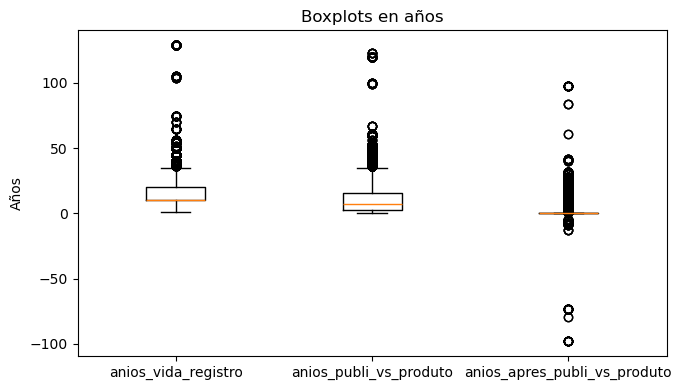

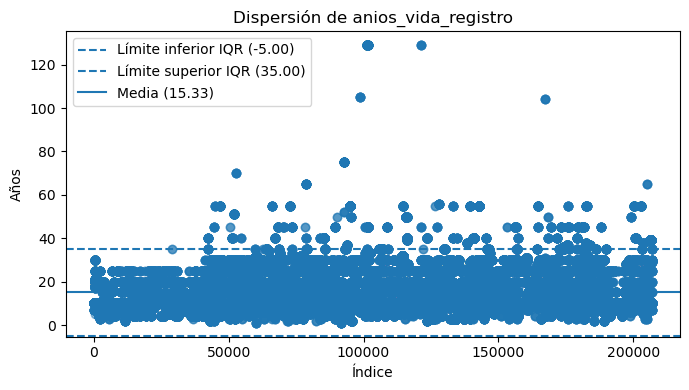

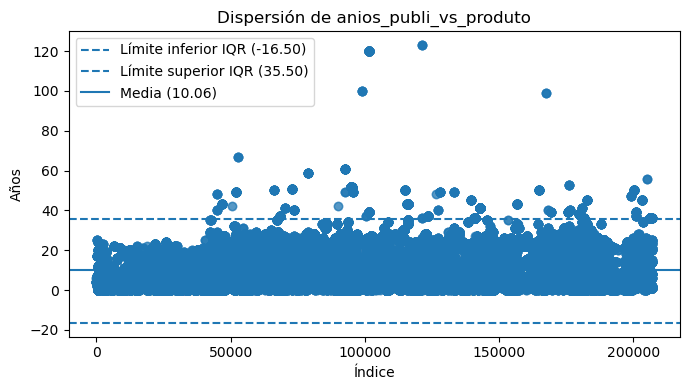

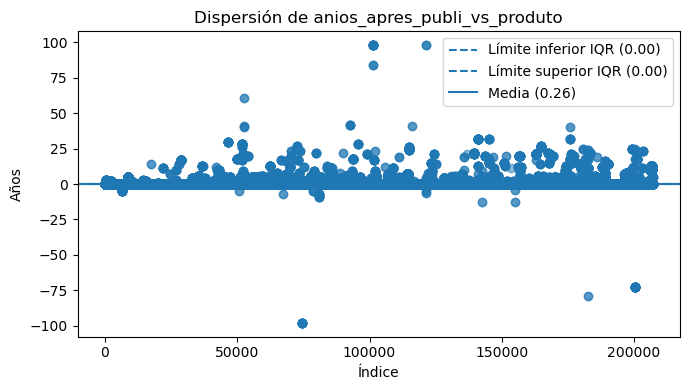

In [29]:
vars_anios = ['anios_vida_registro','anios_publi_vs_produto','anios_apres_publi_vs_produto']

plt.figure(figsize=(7,4))
plt.boxplot([df[v].dropna() for v in vars_anios], vert=True, labels=vars_anios)
plt.title("Boxplots en años")
plt.ylabel("Años")
plt.tight_layout()
plt.show()

# --- 3) Dispersión + IQR + Media por cada variable ---
def plot_scatter_iqr_mean(col):
    s = df[col].dropna()
    if s.empty:
        print(f"[Aviso] {col} no tiene datos válidos.")
        return

    # Límites IQR
    Q1, Q3 = s.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lo, hi = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    mean_val = s.mean()

    # Índices alineados con la serie s
    idx = s.index

    plt.figure(figsize=(7,4))
    plt.scatter(idx, s, alpha=0.5)
    plt.axhline(lo, linestyle='--', label=f"Límite inferior IQR ({lo:.2f})")
    plt.axhline(hi, linestyle='--', label=f"Límite superior IQR ({hi:.2f})")
    plt.axhline(mean_val, linestyle='-', label=f"Media ({mean_val:.2f})")
    plt.title(f"Dispersión de {col}")
    plt.xlabel("Índice")
    plt.ylabel("Años")
    plt.legend()
    plt.tight_layout()
    plt.show()

for col in vars_anios:
    plot_scatter_iqr_mean(col)

In [30]:
# Variables en años
vars_anios = ['anios_vida_registro','anios_publi_vs_produto','anios_apres_publi_vs_produto']

summary = []

for col in vars_anios:
    s = df[col].dropna()
    if s.empty:
        continue
    
    # --- IQR ---
    Q1, Q3 = s.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lo, hi = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    out_iqr = s[(s < lo) | (s > hi)]
    
    # --- Z-score ---
    zscores = zscore(s, nan_policy="omit")
    out_z = s[np.abs(zscores) > 3]
    
    # --- Resumen ---
    summary.append({
        "variable": col,
        "media": round(s.mean(),2),
        "mediana": round(s.median(),2),
        "q1": round(Q1,2),
        "q3": round(Q3,2),
        "lim_inf_iqr": round(lo,2),
        "lim_sup_iqr": round(hi,2),
        "min": round(s.min(),2),
        "max": round(s.max(),2),
        "n_outliers_iqr": int(len(out_iqr)),
        "pct_outliers_iqr": round(100*len(out_iqr)/len(s),2),
        "n_outliers_z": int(len(out_z)),
        "pct_outliers_z": round(100*len(out_z)/len(s),2),
        "total": len(s)
    })

outliers_summary = pd.DataFrame(summary)


outliers_summary

,variable,media,mediana,q1,q3,lim_inf_iqr,lim_sup_iqr,min,max,n_outliers_iqr,pct_outliers_iqr,n_outliers_z,pct_outliers_z,total
0,anios_vida_registro,15.33,10.0,10.0,20.0,-5.0,35.0,1.0,129.0,3837,1.86,1925,0.93,206675
1,anios_publi_vs_produto,10.06,7.0,3.0,16.0,-16.5,35.5,0.0,123.0,2648,1.28,1614,0.78,206993
2,anios_apres_publi_vs_produto,0.26,0.0,0.0,0.0,0.0,0.0,-98.0,98.0,8673,4.19,2199,1.06,206991


Observando los datos encontramos que tenemos años muy bajos (1901) los cuales los cuales podrian ser datos incorrectos sin embargo el problema se encuentra directamente desde la fuente

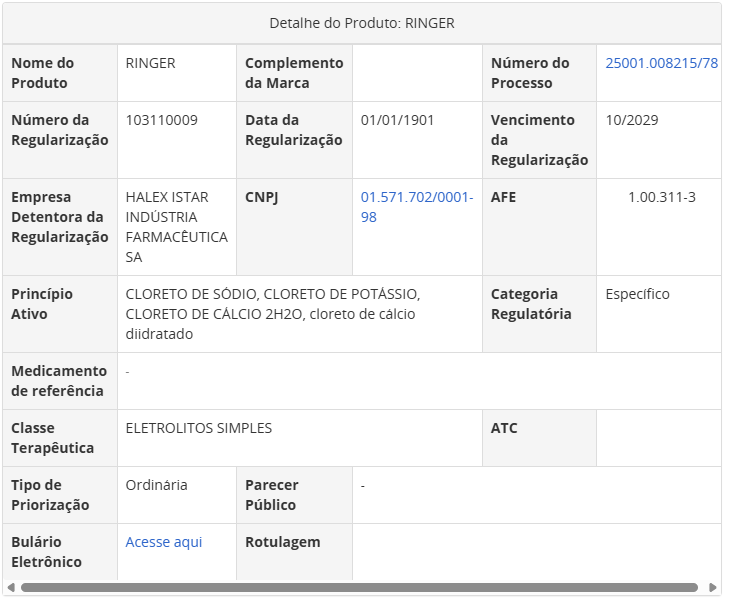

Para futuros calculos respecto a tiempos de validacion de medicamentos no podremos usar estos datos que esta por fuera del promedio y que no hacen sentido, sin embargo su demas información si es necesaria por lo que no se deben eliminar los registros.

#### Principios activos y clases terapeuticas.
num_principios_activos

Esta columna indica cuántos principios activos (API – Active Pharmaceutical Ingredients) contiene un medicamento. Un valor de 1 significa que el producto tiene un solo principio activo, mientras que valores mayores reflejan combinaciones farmacológicas (ej. “Paracetamol + Cafeína + Codeína”). Es útil para detectar productos monocomponentes vs multicomponentes.

num_clases_terapeuticas

Esta columna cuenta cuántas clases terapéuticas se asignan a un medicamento dentro de los sistemas de clasificación farmacológica. Un valor bajo (1 o 2) es lo común, mientras que valores altos pueden sugerir productos con amplio espectro.

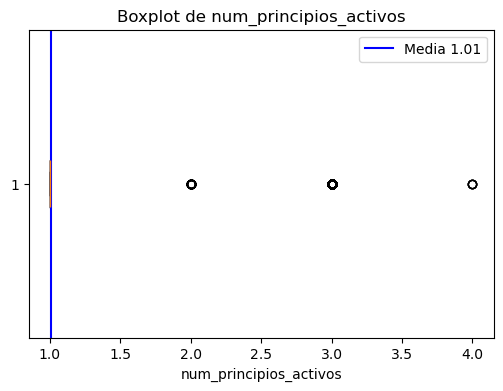

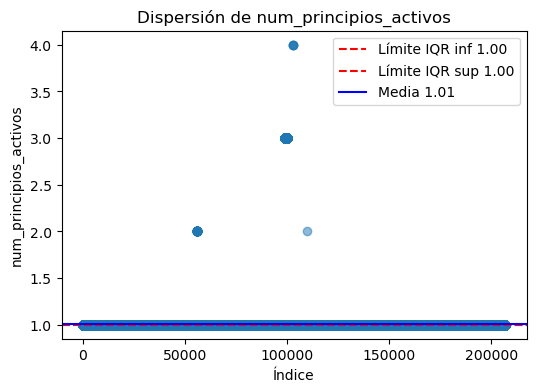

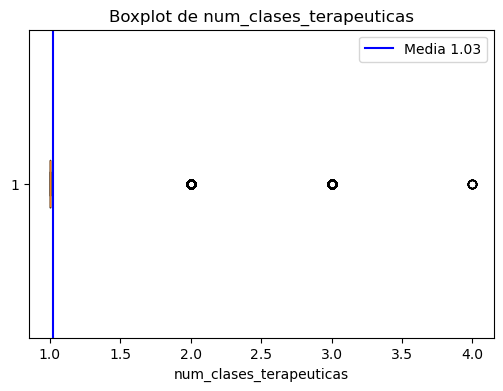

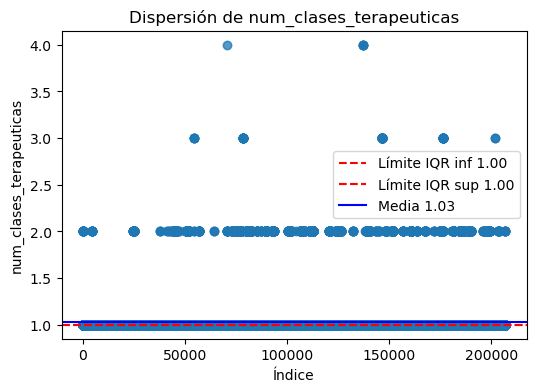

,variable,media,mediana,q1,q3,lim_inf_iqr,lim_sup_iqr,min,max,n_outliers_iqr,pct_outliers_iqr,n_outliers_z,pct_outliers_z,total
0,num_principios_activos,1.01,1.0,1.0,1.0,1.0,1.0,1,4,1161,0.56,1161,0.56,206993
1,num_clases_terapeuticas,1.03,1.0,1.0,1.0,1.0,1.0,1,4,5026,2.43,5026,2.43,206993


In [31]:

cols_num = ['num_principios_activos','num_clases_terapeuticas']
summary_extra = []

# --- Función auxiliar ---
def analizar_variable(col):
    s = df[col].dropna()
    if s.empty:
        print(f"[Aviso] {col} no tiene datos válidos.")
        return
    
    # IQR
    Q1, Q3 = s.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lo, hi = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    out_iqr = s[(s < lo) | (s > hi)]
    
    # Z-score
    zscores = zscore(s, nan_policy="omit")
    out_z = s[np.abs(zscores) > 3]
    
    # Media
    mean_val = s.mean()
    
    # --- Boxplot ---
    plt.figure(figsize=(6,4))
    plt.boxplot(s, vert=False)
    plt.axvline(mean_val, color="blue", linestyle="-", label=f"Media {mean_val:.2f}")
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.legend()
    plt.show()
    
    # --- Dispersión ---
    plt.figure(figsize=(6,4))
    plt.scatter(s.index, s, alpha=0.5)
    plt.axhline(lo, linestyle="--", color="red", label=f"Límite IQR inf {lo:.2f}")
    plt.axhline(hi, linestyle="--", color="red", label=f"Límite IQR sup {hi:.2f}")
    plt.axhline(mean_val, linestyle="-", color="blue", label=f"Media {mean_val:.2f}")
    plt.title(f"Dispersión de {col}")
    plt.xlabel("Índice")
    plt.ylabel(col)
    plt.legend()
    plt.show()
    
    # Resumen
    summary_extra.append({
        "variable": col,
        "media": round(s.mean(),2),
        "mediana": round(s.median(),2),
        "q1": round(Q1,2),
        "q3": round(Q3,2),
        "lim_inf_iqr": round(lo,2),
        "lim_sup_iqr": round(hi,2),
        "min": round(s.min(),2),
        "max": round(s.max(),2),
        "n_outliers_iqr": int(len(out_iqr)),
        "pct_outliers_iqr": round(100*len(out_iqr)/len(s),2),
        "n_outliers_z": int(len(out_z)),
        "pct_outliers_z": round(100*len(out_z)/len(s),2),
        "total": len(s)
    })

# --- Ejecutar para ambas columnas ---
for col in cols_num:
    analizar_variable(col)

outliers_summary_extra = pd.DataFrame(summary_extra)
display(outliers_summary_extra)

| **Columna**            | **Descripción**                                                                               |
| ---------------------- | --------------------------------------------------------------------------------------------- |
| **variable**           | Nombre de la variable analizada (ejemplo: `anios_vida_registro`, `num_principios_activos`).   |
| **media**              | Promedio (valor medio aritmético) de la variable.                                             |
| **mediana**            | Valor central de la distribución (50% de los datos están por debajo y 50% por encima).        |
| **q1**                 | Primer cuartil (25% de los valores están por debajo).                                         |
| **q3**                 | Tercer cuartil (75% de los valores están por debajo).                                         |
| **lim\_inf\_iqr**      | Límite inferior según método IQR (Q1 − 1.5 × IQR). Valores por debajo se consideran outliers. |
| **lim\_sup\_iqr**      | Límite superior según método IQR (Q3 + 1.5 × IQR). Valores por encima se consideran outliers. |
| **min**                | Valor mínimo observado en la variable.                                                        |
| **max**                | Valor máximo observado en la variable.                                                        |
| **n\_outliers\_iqr**   | Número de outliers detectados con la técnica IQR.                                             |
| **pct\_outliers\_iqr** | Porcentaje de registros que son outliers (IQR).                                               |
| **n\_outliers\_z**     | Número de outliers detectados con el método Z-score (z  > º3).                                |
| **pct\_outliers\_z**   | Porcentaje de registros que son outliers según Z-score.                                       |
| **total**              | Total de registros válidos (sin nulos) analizados para la variable.                           |   


Podemos observar que la mayoria de los medicamentos registrados tienen 1 solo principio activo, lo cual es normal, tambien los demas valores que tiene 2 3 y 4 es posible que se den, lo que nos indica esta información es que no es muuy comun.
aunque las metricas muestras que hay mucho outliers porque estan por encima del limite superior esto no es del todo cierto ya que como se menciono antes es posible que se den estos casos, solo que no son muy comunes.

In [32]:
# Filtrar el primer registro con 4 principios activos y mostrar numero de proceso

df_4principios = df[df['num_principios_activos'] == 4][['numeroProcesso','num_principios_activos','principioAtivo']]
df_4principios.iloc[0].tolist()

['25351362035202113',
 np.int64(4),
 'REARRANJO DE ROTAVÍRUS HUMANO/BOVINO G1, REARRANJO DE ROTAVÍRUS HUMANO/BOVINO G2, REARRANJO DE ROTAVÍRUS HUMANO/BOVINO G3, REARRANJO DE ROTAVÍRUS HUMANO/BOVINO G4, REARRANJO DE ROTAVÍRUS HUMANO/BOVINO P1A[8], VACINA ROTAVÍRUS HUMANO/BOVINO G1, G2, G3, G4 E P1A[8] (ATENUADA)']

Respecto a la clase terapeutica podemos ver que tambien lo mas comun es una clase sin embargo en este caso tambien tenemos vastante registro conr 2 clases y en menos medida 3 y 4, esto no indica que no es comun que un medicamento tenga varias clases terapeuticas pero es posible. Tampoco se consideran outliers.

In [33]:
df_4principios = df[df['num_clases_terapeuticas'] == 4][['numeroProcesso','classesTerapeuticas']]
df_4principios.iloc[4].tolist()

['25351268161202425',
 'AGENTES CONTRA DOENÇAS OBSTRUTIVAS DAS VIAS AÉREAS, SISTEMA RESPIRATÓRIO, ADRENÉRGICOS, PARA INALAÇÃO']

# Análisis de distribuciones

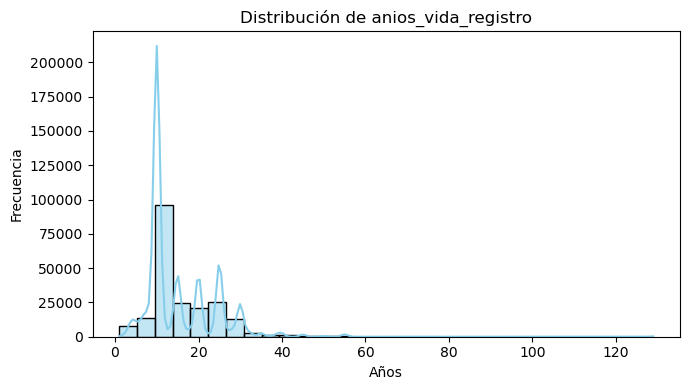

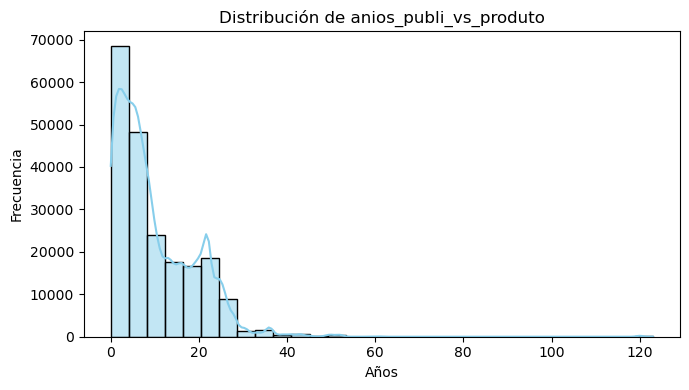

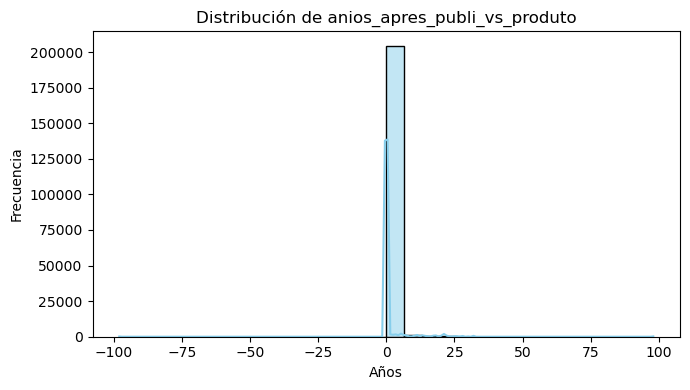

,variable,media,mediana,desv_std,min,max,asimetria (skewness),curtosis,n
0,anios_vida_registro,15.33,10.0,8.73,1.0,129.0,2.40,17.18,206675
1,anios_publi_vs_produto,10.06,7.0,9.06,0.0,123.0,1.99,12.70,206993
2,anios_apres_publi_vs_produto,0.26,0.0,2.36,-98.0,98.0,3.80,614.88,206991


In [34]:
vars_anios = ['anios_vida_registro','anios_publi_vs_produto','anios_apres_publi_vs_produto']

summary_dist = []

for col in vars_anios:
    s = df[col].dropna()
    if s.empty:
        continue
    
    # --- Histogram + Densidad ---
    plt.figure(figsize=(7,4))
    sns.histplot(s, bins=30, kde=True, color="skyblue")
    plt.title(f"Distribución de {col}")
    plt.xlabel("Años")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()
    
    # --- Métricas de distribución ---
    skewness = skew(s)
    kurt = kurtosis(s)
    
    summary_dist.append({
        "variable": col,
        "media": round(s.mean(),2),
        "mediana": round(s.median(),2),
        "desv_std": round(s.std(),2),
        "min": round(s.min(),2),
        "max": round(s.max(),2),
        "asimetria (skewness)": round(skewness,2),
        "curtosis": round(kurt,2),
        "n": len(s)
    })

# Crear tabla resumen
summary_dist_df = pd.DataFrame(summary_dist)

display(summary_dist_df)

#### anios_vida_registro

* tiene mucha asimetría, un fuerte sesgo hacia la derecha.
* la curtosis es muy pesada con muchos outliers.
* Para EDA descriptivo, reportar mediana y percentiles.
* Para modelos → conviene transformación log(1+x) o winsorizar (capar) en ~30 años.

#### anios_publi_vs_produto

* presenta asimetría marcada hacia la derecha y colas pesadas.
* la media está inflada por valores extremos.
* Para EDA descriptivo, usar mediana y percentiles.
* Para modelos → aplicar log(1+x) o recortar valores mayores a ~30 años.


#### anios_apres_publi_vs_produto

* tiene problemas de calidad de datos, aparecen valores negativos y máximos poco realistas.
* la distribución está dominada por errores, con mucha curtosis y asimetría.
* Para EDA descriptivo, limpiar datos negativos y extremos.
* Para modelos → trabajar solo con rango normal (0–2 años) antes de cualquier transformación.


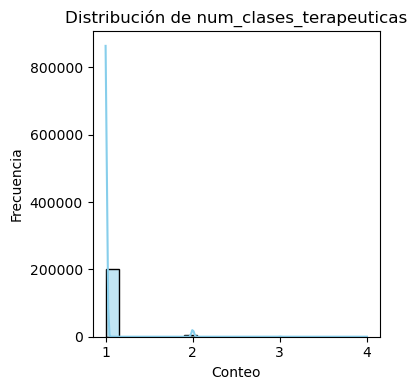

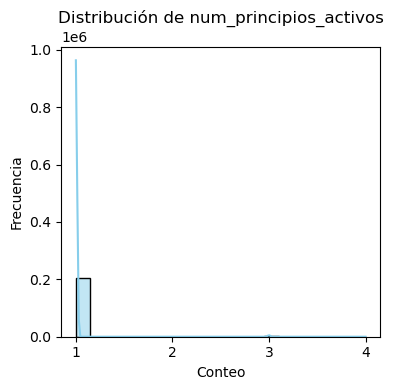

,variable,media,mediana,desv_std,min,max,asimetria (skewness),curtosis,n
0,num_clases_terapeuticas,1.03,1.0,0.16,1,4,6.74,49.38,206993
1,num_principios_activos,1.01,1.0,0.15,1,4,13.37,177.55,206993


In [35]:
vars_conteo = ["num_clases_terapeuticas", "num_principios_activos"]

summary_dist_conteo = []

for col in vars_conteo:
    s = df[col].dropna()
    if s.empty:
        continue
    
    # --- Histograma + Densidad ---
    plt.figure(figsize=(4,4))
    sns.histplot(s, bins=20, kde=True, color="skyblue")
    plt.title(f"Distribución de {col}")
    plt.xlabel("Conteo")
    plt.ylabel("Frecuencia")
    plt.xticks(np.arange(s.min(), s.max()+1, 1))
    plt.tight_layout()
    plt.show()
    
    # --- Métricas de distribución ---
    skewness = skew(s)
    kurt = kurtosis(s)
    
    summary_dist_conteo.append({
        "variable": col,
        "media": round(s.mean(),2),
        "mediana": round(s.median(),2),
        "desv_std": round(s.std(),2),
        "min": int(s.min()),
        "max": int(s.max()),
        "asimetria (skewness)": round(skewness,2),
        "curtosis": round(kurt,2),
        "n": len(s)
    })

summary_dist_conteo_df = pd.DataFrame(summary_dist_conteo)

display(summary_dist_conteo_df)

#### num_clases_terapeuticas

* la mayoría de los registros tienen solo una clase terapéutica.
* existe asimetría hacia la derecha y curtosis alta, pero esto se debe a que unos pocos productos pueden pertenecer a más de una clase.
* el máximo de 4 es normal y no corresponde a un error.
* para EDA descriptivo, basta con reportar mediana y percentiles.
* para modelos, no requiere transformación adicional.

##### num_principios_activos

* casi todos los registros tienen un único principio activo.
* la distribución muestra fuerte asimetría y curtosis, causada por casos con combinaciones de varios principios.
* el máximo de 4 es normal y no corresponde a un error.
* para EDA descriptivo, reportar mediana y percentiles.
* para modelos, la variable puede usarse tal cual o binarizarse (mono vs multi-ingrediente) según el análisis.

In [37]:
df.to_parquet("df_light_cleaned.parquet", engine="pyarrow", index=False)